In [5]:
import os
from glob import glob
import shutil

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [6]:
def clean_folder(folder):
    try:
        shutil.rmtree(folder)
    except FileNotFoundError:
        pass
    os.mkdir(folder)

clean_folder('../datasets/maps')
clean_folder('../datasets/maps/html')
clean_folder('../datasets/maps/png')

In [7]:
from folium import Map
from folium.plugins import HeatMap

In [8]:
fns = sorted(glob(f'../datasets/geolocated/*.xlsx'))

for fn in fns:
    print(fn)
    language = os.path.basename(fn).replace('.xlsx',  '')
    geo_df = pd.read_excel(fn)
    geo_df = geo_df[['longitude', 'latitude']].dropna()

    for_map = Map(location=[50, 10], zoom_start=4.5, tiles='CartoDB PositronNoLabels') # Stamen watercolo

    hm_wide = HeatMap(
        list(zip(geo_df['latitude'].values, geo_df['longitude'].values)),
        min_opacity=0.2,
        radius=33, 
        blur=43, 
        max_zoom=1,
        zoom_control=False,
        scrollWheelZoom=False,
        dragging=False
    )

    for_map.add_child(hm_wide)
    for_map.save(f'../datasets/maps/html/{language}.html')

../datasets/geolocated/dutch.xlsx
../datasets/geolocated/english.xlsx
../datasets/geolocated/french.xlsx
../datasets/geolocated/german.xlsx


In [9]:
import os
from pathlib import Path
path = Path(os.getcwd())
parp = path.parent.absolute()

In [11]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

browser = webdriver.Chrome(ChromeDriverManager().install())

for language in 'dutch english german french'.split():
    browser.get(f'file:///{parp}/datasets/maps/html/{language}.html')
    browser.get_screenshot_as_file(f'../datasets/maps/png/{language}.png') 

[WDM] - Current google-chrome version is 90.0.4430
[WDM] - Get LATEST driver version for 90.0.4430
[WDM] - Driver [/Users/mikekestemont/.wdm/drivers/chromedriver/mac64/90.0.4430.24/chromedriver] found in cache


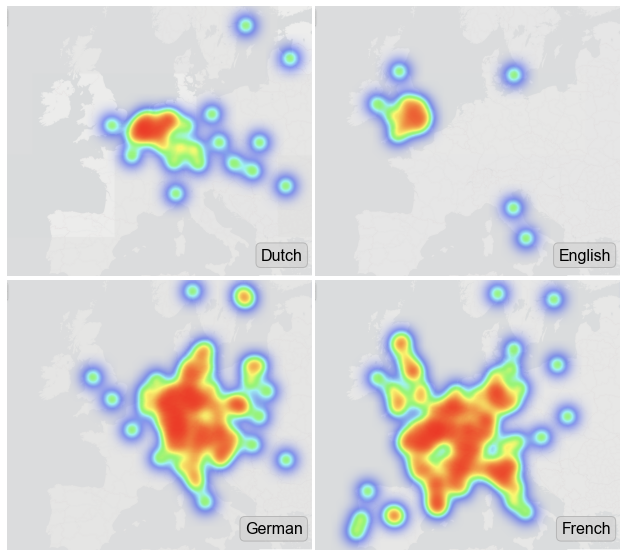

In [12]:
from mpl_toolkits.axes_grid1 import ImageGrid


fig = plt.figure(figsize=(15, 10))
grid = ImageGrid(fig, 111,  share_all = True,
                 nrows_ncols=(2, 2),
                 axes_pad=0.05,  # pad between axes in inch.
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])

vert_stride = 27
hort_stride = 70

for ax, language in zip(grid, 'dutch english german french'.split()):
    img = plt.imread(f'../datasets/maps/png/{language}.png')
    img = img[:img.shape[0]-vert_stride, hort_stride:img.shape[1]-hort_stride*6]
    ax.annotate(language.capitalize(), xy=(0.97, 0.05), xycoords='axes fraction',
                horizontalalignment='right', verticalalignment='bottom',
                fontfamily='Arial', fontsize=16,
                bbox=dict(facecolor='lightgrey', edgecolor='darkgrey',
                          boxstyle='round', alpha=0.7))
    ax.axis('off')
    ax.imshow(img)


plt.savefig('../datasets/maps/grid.pdf', bbox_inches='tight')